# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Reading in the CSV file named using pandas' read_csv function
# Use the usecols parameter in the read_csv function to specify the which columns that should be read into the DataFrame.
df = pd.read_csv('nyc-parking-violations-2020.csv', usecols=['Registration State','Plate Type','Issue Date', 'Summons Number','Violation Code','Vehicle Make','Vehicle Color','Violation Time','Street Name',])

# Inspect the first few rows of the dataset
df.head()

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Make,Violation Time,Street Name,Vehicle Color
0,1477633194,NJ,PAS,05/08/1972 12:00:00 AM,16,HONDA,0523P,43 ST,BK
1,1449715424,PA,PAS,08/29/1977 12:00:00 AM,98,ME/BE,0428P,UNION ST,BLK
2,1455779155,NJ,PAS,10/03/1988 12:00:00 AM,20,LEXUS,0625A,CLERMONT AVENUE,BLACK
3,1458800908,OH,PAS,01/03/1990 12:00:00 AM,21,CHEVR,1106A,DIVISION AVE,NaN
4,1466038676,NY,PAS,02/14/1990 12:00:00 AM,21,JEEP,1253A,GRAND ST,GREY


In [2]:
# Inspect the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495734 entries, 0 to 12495733
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Summons Number      int64 
 1   Registration State  object
 2   Plate Type          object
 3   Issue Date          object
 4   Violation Code      int64 
 5   Vehicle Make        object
 6   Violation Time      object
 7   Street Name         object
 8   Vehicle Color       object
dtypes: int64(2), object(7)
memory usage: 858.0+ MB


# Data Cleaning

## Handling Missing Data

In [3]:
# Check for null values in the DataFrame
df.isnull().any()

Summons Number        False
Registration State    False
Plate Type            False
Issue Date            False
Violation Code        False
Vehicle Make           True
Violation Time         True
Street Name            True
Vehicle Color          True
dtype: bool

In [4]:
# Aggregate the null values in each column
df.isnull().sum()

Summons Number             0
Registration State         0
Plate Type                 0
Issue Date                 0
Violation Code             0
Vehicle Make           62420
Violation Time           278
Street Name             1417
Vehicle Color         391982
dtype: int64

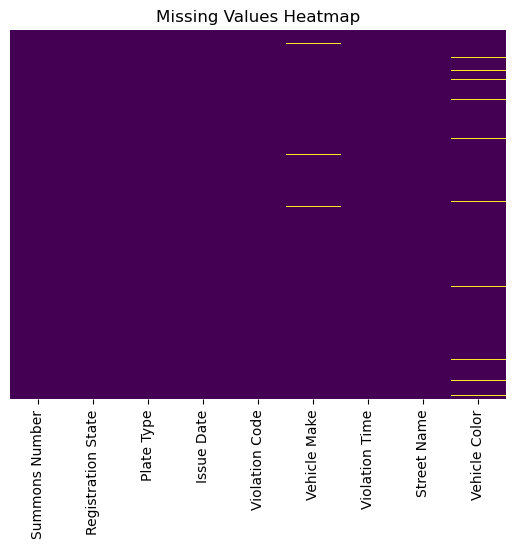

In [5]:
# Plot the missing values using a heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# Drop rows with missing values in the "Street Name" column as they are not relevant for the analysis.
df.dropna(subset=['Street Name'], inplace=True)
df

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Make,Violation Time,Street Name,Vehicle Color
0,1477633194,NJ,PAS,05/08/1972 12:00:00 AM,16,HONDA,0523P,43 ST,BK
1,1449715424,PA,PAS,08/29/1977 12:00:00 AM,98,ME/BE,0428P,UNION ST,BLK
2,1455779155,NJ,PAS,10/03/1988 12:00:00 AM,20,LEXUS,0625A,CLERMONT AVENUE,BLACK
3,1458800908,OH,PAS,01/03/1990 12:00:00 AM,21,CHEVR,1106A,DIVISION AVE,NaN
4,1466038676,NY,PAS,02/14/1990 12:00:00 AM,21,JEEP,1253A,GRAND ST,GREY
...,...,...,...,...,...,...,...,...,...
12495729,1458428930,NY,COM,01/03/2040 12:00:00 AM,19,FORD,1111A,3RD AVE,BR
12495730,1455266164,NY,PAS,04/19/2045 12:00:00 AM,20,HONDA,0444P,PELHAM PARK DR,BLK
12495731,1446438314,NY,PAS,01/17/2049 12:00:00 AM,40,FORD,0210A,LYDIG AVE,GY
12495732,1454469730,NY,PAS,12/19/2063 12:00:00 AM,19,TOYOT,0225P,E 68 STREET,BLK


## Properly formatting the dates and time 

In [22]:
# Converting the "Issue Date" column in the DataFrame into a datetime format.
df['Issue Date'] = pd.to_datetime(df['Issue Date'], format="%m/%d/%Y %I:%M:%S %p")

# Using the data for July 2020 to Jun 2021 data
df = df.loc[(df['Issue Date']>='2020-07-01')&(df['Issue Date']<'2021-07-01'), :]

# Creating a dictionary for month names
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

# Adding a new column "Month" to the DataFrame with the month name extracted from the "Issue Date" column.
df['Month'] = df['Issue Date'].dt.month.map(month_dict)

# Printing the first few rows of the DataFrame to verify the changes.
df.head()

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Make,Violation Time,Street Name,Vehicle Color,Month,Day of Week,Hour
12494952,1465737649,NY,PAS,2020-07-01,21,HONDA,0809A,WEST 207 ST,GREY,Jul,2,0
12494953,1458275474,NY,PAS,2020-07-01,21,BMW,0819A,E 167 ST,BK,Jul,2,0
12494954,1448180661,NY,PAS,2020-07-01,98,VOLKS,0316P,EAST 15 ST,BLK,Jul,2,0
12494955,1461203223,GV,PAS,2020-07-03,46,FORD,0555P,W 25 ST,WHITE,Jul,4,0
12494956,1465088623,NY,PAS,2020-07-03,17,NISSA,0720A,43ND STREET,BK,Jul,4,0


# Exploratory Data Analysis (EDA)

## 1. Distribution of violations by state

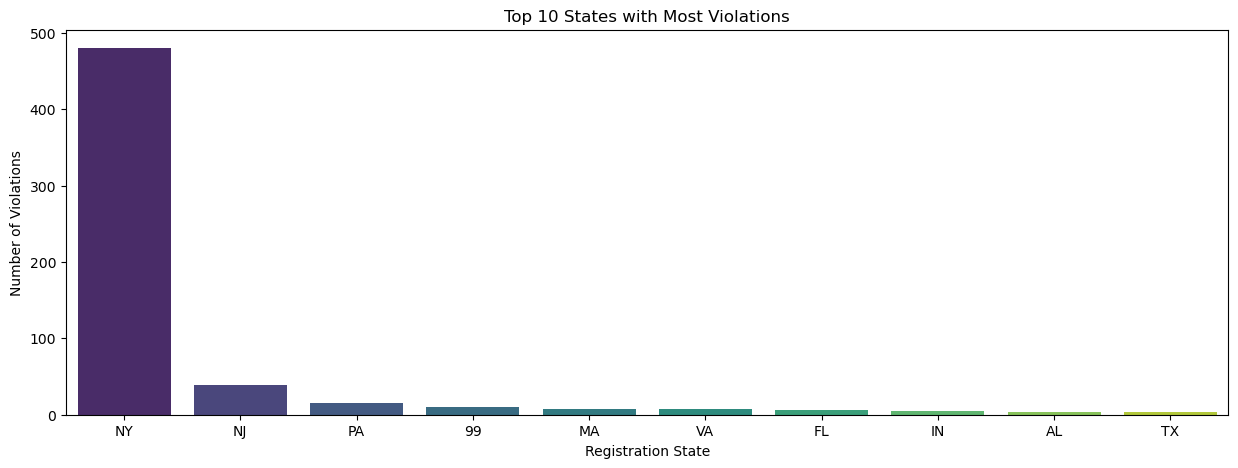

In [8]:
# Count the number of parking violations by registration state
state_counts = df['Registration State'].value_counts().iloc[:10]

# Plot a bar chart of the number of parking violations by state
plt.figure(figsize=(15,5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Top 10 States with Most Violations')
plt.xlabel('Registration State')
plt.ylabel('Number of Violations')
plt.show()

## 2. Top 10 vehicle makes with the most violations

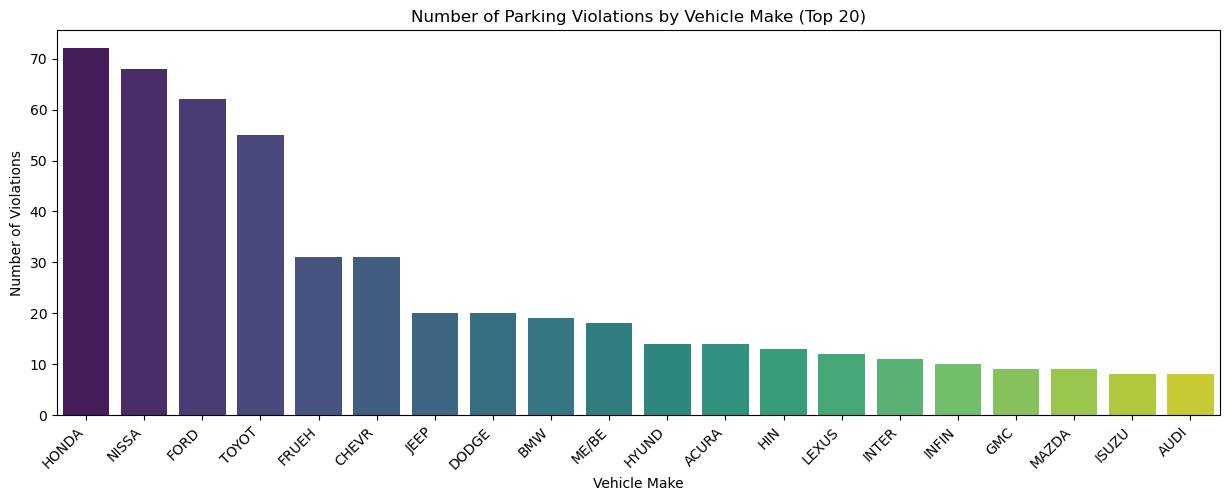

In [9]:
# Count the number of parking violations by vehicle make
make_counts = df['Vehicle Make'].value_counts()

# Plot a bar chart of the number of parking violations by vehicle make
plt.figure(figsize=(15,5))
sns.barplot(x=make_counts[:20].index, y=make_counts[:20].values, palette='viridis')
plt.title('Number of Parking Violations by Vehicle Make (Top 20)')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45, ha='right')
plt.show()

## 3. Relationship between Street Name and Parking Violation Counts



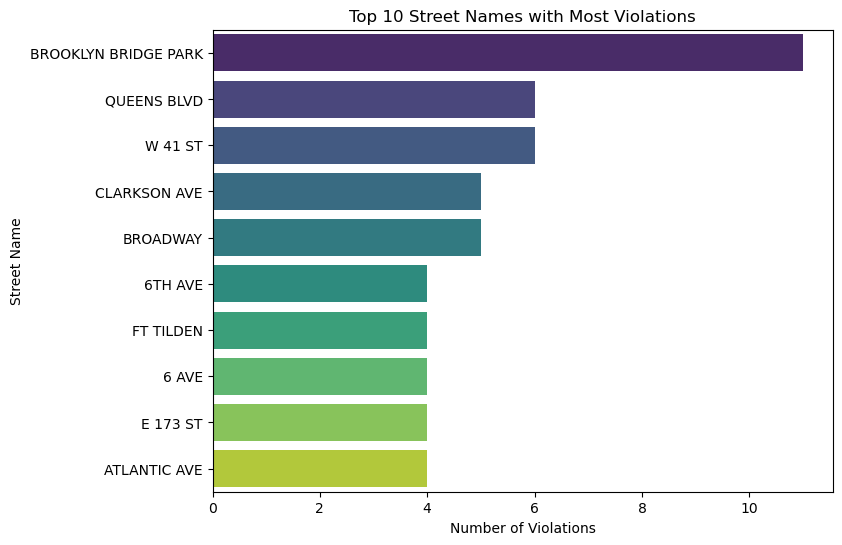

In [10]:
# Top 10 Street Names with Most Violations
top_10_streets = df['Street Name'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_streets.values, y=top_10_streets.index, palette='viridis')
plt.title('Top 10 Street Names with Most Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Street Name')
plt.show()

## 4. The plate type that has the most parking violations for each violation code

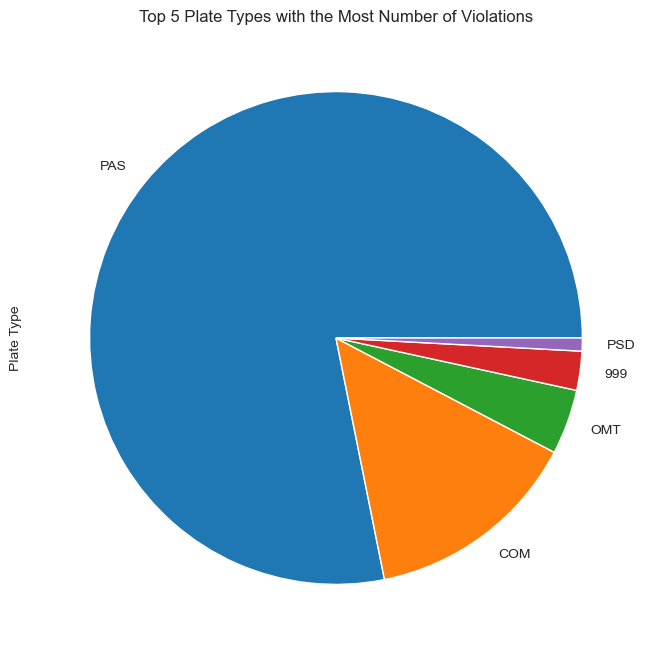

In [54]:
# Creating the pie chart showing top 5 plates with the most number of Violations
fig, ax = plt.subplots(figsize=(8,8))
df['Plate Type'].value_counts().head(5).plot(kind='pie', ax=ax)
ax.set_title('Top 5 Plate Types with the Most Number of Violations')
plt.show()

## 5. Parking violations by month:

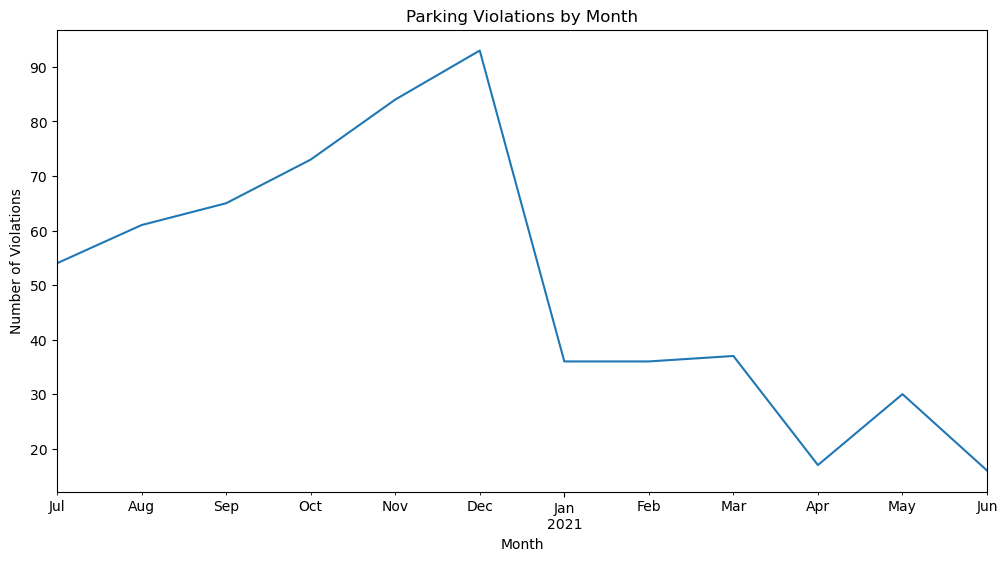

In [13]:
# Group the data by month and count the number of violations
monthly_violations = df.groupby(df['Issue Date'].dt.to_period('M'))['Summons Number'].count()

# Plot the time series
fig, ax = plt.subplots(figsize=(12,6))
monthly_violations.plot(ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Violations')
ax.set_title('Parking Violations by Month')
plt.show()

## 6. Parking Violations By Day

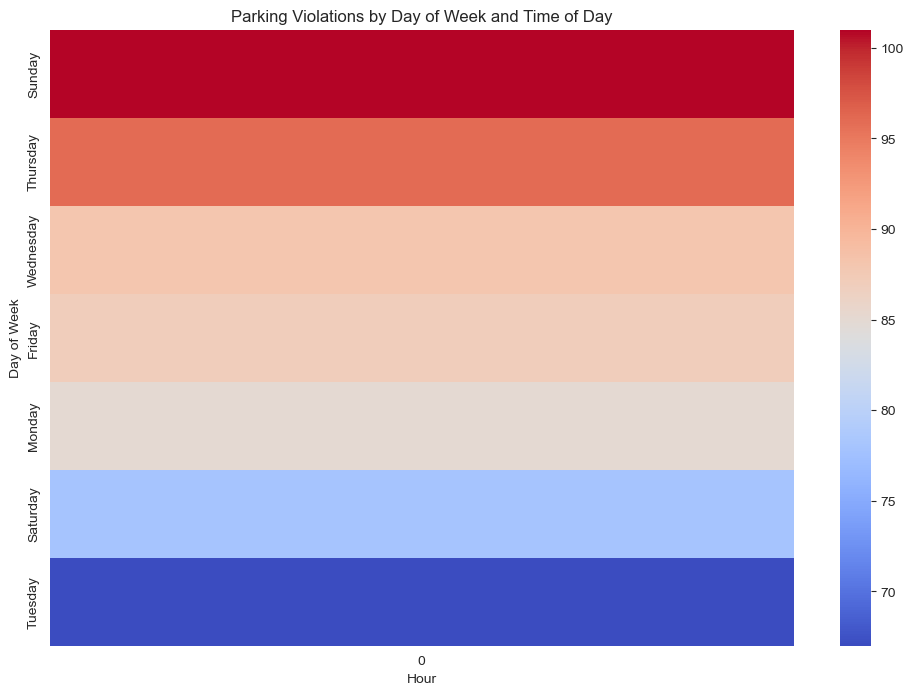

In [37]:
# Heatmap of parking violations by day of week and time of day:

# Extract the day of week and hour from the Issue Date column
# Extract the day of week and hour from the Issue Date column
df['Day of Week'] = df['Issue Date'].dt.dayofweek
df['Day of Week'] = df['Day of Week'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['Hour'] = df['Issue Date'].dt.hour

# Pivot the data to create a table of violations by day of week and hour
heatmap_data = df.pivot_table(values='Summons Number', index='Day of Week', columns='Hour', aggfunc='count')

# Sort the pivot table by the sum of violations for each day of the week
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='coolwarm', ax=ax)
ax.set_xlabel('Hour')
ax.set_ylabel('Day of Week')
ax.set_title('Parking Violations by Day of Week and Time of Day')
plt.show()

# EDA of Missing Values 

In [56]:
# Create a new dataframe with the columns we are interested in
df_missing = df[['Vehicle Make', 'Vehicle Color', 'Violation Code']].copy()
df_missing

,Vehicle Make,Vehicle Color,Violation Code
12494952,HONDA,GREY,21
12494953,BMW,BK,21
12494954,VOLKS,BLK,98
12494955,FORD,WHITE,46
12494956,NISSA,BK,17
...,...,...,...
12495549,GMC,WHITE,21
12495550,ISUZU,RED,40
12495551,FORD,WHITE,78
12495552,TOYOT,GOLD,5


In [57]:
# Check the percentage of missing values in each column
missing_percentage = df_missing.isnull().mean() * 100

# Print the percentage of missing values in each column
print('Percentage of missing values:\n', missing_percentage)

Percentage of missing values:
 Vehicle Make       3.322259
Vehicle Color     10.797342
Violation Code     0.000000
dtype: float64


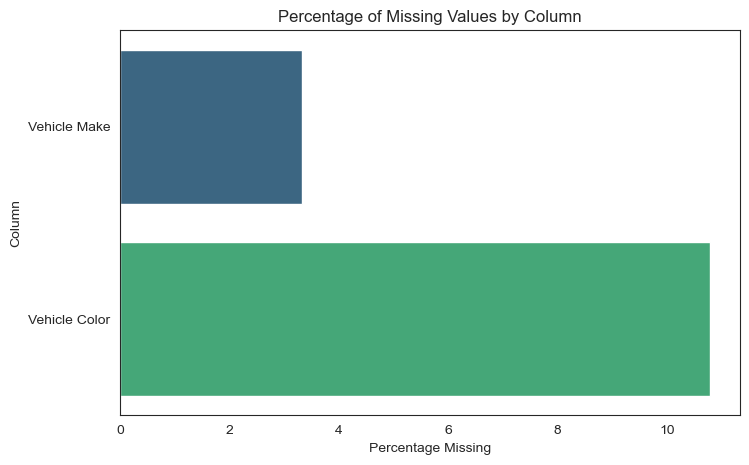

In [58]:
# Create a horizontal bar chart to visualize the percentage of missing values by column
missing_perc = df.isnull().mean() * 100
missing_perc = missing_perc[missing_perc > 0].sort_values()
plt.figure(figsize=(8, 5))
sns.set_style('white')
sns.barplot(x=missing_perc.values, y=missing_perc.index, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage Missing')
plt.ylabel('Column')
plt.show()

# Conclusion

This Exploratory Data Analysis (EDA) has shown that the dataset contains over 12 million records of parking violations in New York City from July 2020 to June 2021. The analysis explored the distribution of violations by state, the top vehicle makes with the most violations, and handled missing data in the dataset. The EDA revealed that the majority of violations occur in New York state, with Honda vehicles receiving the most violations. The heatmap analysis also showed that there are significant numbers of missing values in the "Vehicle Make" and "Vehicle Color" columns. Besides, the most common types of plates for vehicles that were issued parking violations were passenger vehicles (PAS) and commercial vehicles (COM). Also, there are some peak months for parking violations in the year, with the highest number of violations occurring in November. Lastly, Sundays registered the highest number of violations while Tuesdays registered the least number of violations.

Based on the analysis, the following recommendations can be made to the New York City authorities to improve parking violation management:

i. NYC to increase enforcement efforts in high-violation areas: As the analysis shows, the majority of violations occur in New York state, so the city should assess the streets and neighborhoods with the highest rates of violations to understand the root causes and take necessary actions.

For instance, if most of the violations occur due to drivers being unable to find a legal parking spot, the city could consider increasing the availability of parking. This could involve building more parking garages or implementing a smart parking system that can help drivers locate available spots more easily. By addressing the underlying issues that lead to violations, the city could reduce the number of violations and improve the overall parking experience for residents and visitors alike.

In addition, the city authorities can use this information to allocate more resources to enforce parking regulations in high-violation areas. This could involve increasing the number of parking enforcement officers or deploying technology such as license plate recognition systems to identify and ticket violators more efficiently. With targeted enforcement efforts in high-violation areas, the city can deter drivers from parking illegally and improve compliance with parking regulations.

The city can also improve parking signage in case most of the violations occur due to unclear or confusing parking signage. This would ensure better visibility of signages on the road.

ii. Increasing enforcement in the streets with the highest parking violations: While the purpose of this EDA was not to determine if parking enforcement is adequate, increasing the number of parking enforcement officers on these street could help deter drivers from parking illegally and also generate more revenue to the city by ensuring all parking violations are ticketed.

iii. Encourage alternative modes of transportation: The high number of violations, particularly on Sundays, suggests that there may be a need for more parking spaces in the city. However, the city authorities can also encourage the use of alternative modes of transportation, such as public transit and bicycles, to reduce the demand for parking.

iv. Increase public awareness: The analysis showed that there are peak months for parking violations in the year, with the highest number of violations occurring in November. The authorities can use this information to increase public awareness of parking regulations during peak months.

Overall, these insights can inform policy and enforcement decisions related to parking violations in NYC. By increasing enforcement efforts, improving parking availability, and enhancing data quality, the city can reduce the number of parking violations, increase revenue, and enhance the overall parking experience for residents and visitors.